# Capstone 2

For this assignment, I will be looking at a data set of wine quality. The data set was downloaded and Kaggle.com, and original source of the data is the UCI Machine Learning Repository. The data set can be found [here](https://www.kaggle.com/rajyellow46/wine-quality).     

## First Steps

To begin, let's start by importing the packages we are going to use.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now that the packages have been imported, lets get the data into a data frame.

In [2]:
data = pd.read_csv("winequalityN.csv") 

Let's now start clean and explore the data.

## Data Cleaning

To clean the data, we are going to check if there are any null values in or data frame. If there are, we will replace the blank cells with the mean of the rest of the column.

In [3]:
Sum = data.isnull().sum()
Percentage = ( data.isnull().sum()/data.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.000000
fixed acidity,10,0.001539
volatile acidity,8,0.001231
citric acid,3,0.000462
residual sugar,2,0.000308
chlorides,2,0.000308
free sulfur dioxide,0,0.000000
total sulfur dioxide,0,0.000000
density,0,0.000000
pH,9,0.001385


Looks like we have a few blank cells. Let's clean the data.

This will fill in any cell with a null value with the mean of the column.

In [4]:
def null_cell(data): 
    total_missing_values = data.isnull().sum() 
    missing_values_per = data.isnull().sum()/data.isnull().count() 
    null_values = pd.concat([total_missing_values, missing_values_per], axis=1, keys=['total_null', 'total_null_perc']) 
    null_values = null_values.sort_values('total_null', ascending=False) 
    return null_values[null_values['total_null'] > 0] 

fill_list = (null_cell(data)).index

data_clean = data.copy()

for col in fill_list:
    data_clean.loc[:, col].fillna(data_clean.loc[:, col].mean(), inplace=True)

In [5]:
Sum = data_clean.isnull().sum()
Percentage = ( data_clean.isnull().sum()/data_clean.isnull().count())

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
type,0,0.0
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0


## Data Exploration

Let's start exploring the data. In particular, I'm interested in the sulfite variable relation to quality. Sulfites are added to wine in order to prevent wine from developing bacteria, but does that affect the quality of the wine?

Note that the dataset uses the term sulphates. Sulphates are not used in winemaking and most of the time they are not safe for consumption. After some research, it was clear that the term meant was sulfites, which are used in winemaking.

We'll use describe() in order to get a quick summary of our data.

In [8]:
data_clean.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Now, let's get a distribution of the quality variable. It will show us how it is  spread.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


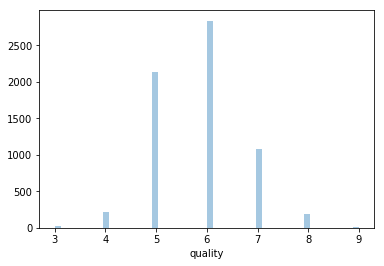

In [9]:
sns.distplot(data_clean['quality'], kde=False)

Let's get a similar plot for the sulfites variable.

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


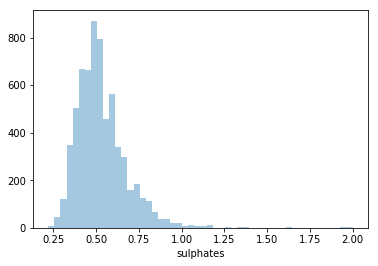

In [21]:
sns.distplot(data_clean['sulphates'], kde=False)

Does the sulfite level affect the quality of the wine? Let's use boxplots.

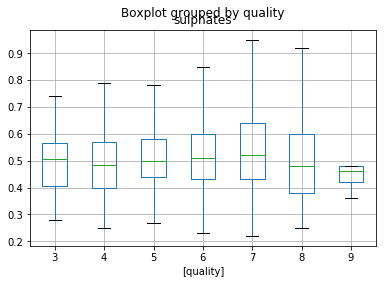

In [20]:
dataSUL = data_clean[['quality','sulphates']]
dataSUL.boxplot(by='quality',showfliers=False)

So the boxplots show little difference, but could this be due to type being a confonding variable? Let's see.

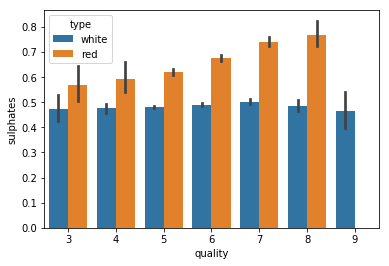

In [32]:
sns.barplot(x='quality',y='sulphates',hue="type", 
            data=data_clean, orient='v')

Yep, type was a confonding variable. White wines tend to have a similar sulfite level regardless of type, while the red wines vary.

This result is interesting. It shows that higher quality red wines have more sulfites. However, I want to dig deeper into with an experiment about sulfites. I believe it would be very helpful here.

## A/B Test proposal

Does the additon of sulfites have a negative effect on wine quality? With consumers being more concerned about the health effects of the products that they buy and with the rise of organic products, this question could be important. For this experiment, we will test if a organically made wine has a lower quality score than the same wine made with sulfites.

We will draw a random sample of wine consumers and assign them to two groups, A or B. A will recieve the organic wine, while B will receive the non-organic wine. Participants will be asked to sample the wine and provide a quality rating (0-10).

If the quality rating for the organic wine is the same or lower than the non-organic wine, we conclude that the organic nature of the wine has no effect on quality. If it is within a positive half rating point, we will retest. If it is higher than that, we conclude that the organic nature of the wine has a positve effect on quality.   